/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/p

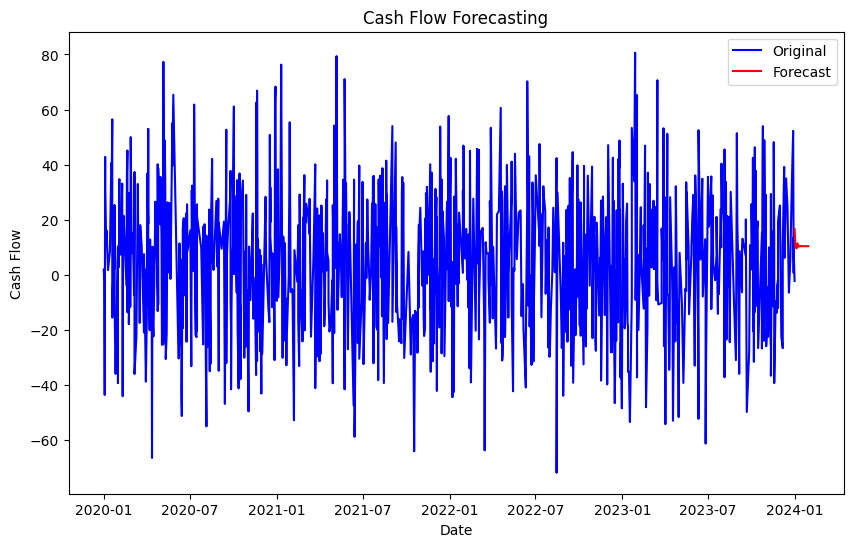

           Date  Forecasted Value
1000 2023-12-31         16.714400
1001 2024-01-01         13.591366
1002 2024-01-02          9.929243
1003 2024-01-03          9.905925
1004 2024-01-04          9.636734
1005 2024-01-05          9.807324
1006 2024-01-06         11.436725
1007 2024-01-07         10.644733
1008 2024-01-08         10.333070
1009 2024-01-09         10.263199
1010 2024-01-10         10.370372
1011 2024-01-11         10.474967
1012 2024-01-12         10.571165
1013 2024-01-13         10.442397
1014 2024-01-14         10.419232
1015 2024-01-15         10.421017
1016 2024-01-16         10.451283
1017 2024-01-17         10.461311
1018 2024-01-18         10.460150
1019 2024-01-19         10.443148
1020 2024-01-20         10.443690
1021 2024-01-21         10.446433
1022 2024-01-22         10.450982
1023 2024-01-23         10.450637
1024 2024-01-24         10.449219
1025 2024-01-25         10.447466
1026 2024-01-26         10.448158
1027 2024-01-27         10.448752
1028 2024-01-2

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Load the data
data = pd.read_excel('/content/time.xlsx')

# Convert the date column to datetime format
data['Date'] = pd.to_datetime(data['Date'])

# Set the date column as the index
data.set_index('Date', inplace=True)

# Define and fit the ARIMA model
model = ARIMA(data['Cash Flow'], order=(5,1,0)) # Example order, you may need to tune this
model_fit = model.fit()

# Forecast future cash flows
forecast_steps = 30  # Adjust according to your needs
forecast = model_fit.forecast(steps=forecast_steps)

# Plot the original data and the forecast
plt.figure(figsize=(10, 6))
plt.plot(data.index, data['Cash Flow'], color='blue', label='Original')
plt.plot(pd.date_range(start=data.index[-1], periods=forecast_steps, freq='d'), forecast, color='red', label='Forecast')
plt.title('Cash Flow Forecasting')
plt.xlabel('Date')
plt.ylabel('Cash Flow')
plt.legend()
plt.show()

# Create a DataFrame for the forecasted values
forecast_dates = pd.date_range(start=data.index[-1], periods=forecast_steps, freq='d')
forecast_values = forecast
forecast_df = pd.DataFrame({'Date': forecast_dates, 'Forecasted Value': forecast_values})
print(forecast_df)



INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmphpuln97h/768piku8.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmphpuln97h/n4wp7o97.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=17853', 'data', 'file=/tmp/tmphpuln97h/768piku8.json', 'init=/tmp/tmphpuln97h/n4wp7o97.json', 'output', 'file=/tmp/tmphpuln97h/prophet_modele4y4qbj2/prophet_model-20240518111733.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:17:33 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:17:33 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


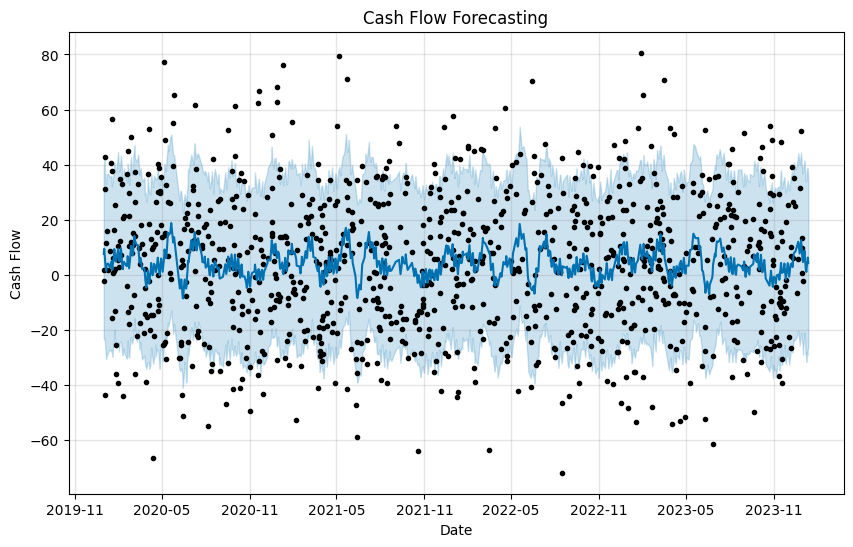

            ds      yhat  yhat_lower  yhat_upper
730 2024-01-01  4.674347  -28.869703   37.165745
731 2024-01-02  6.746154  -25.227612   39.323140
732 2024-01-03  6.954264  -23.775889   39.728748
733 2024-01-04  8.801069  -20.843511   41.535115
734 2024-01-05  6.433732  -23.131131   38.354057
735 2024-01-06  4.123819  -28.195196   33.976504
736 2024-01-07  1.652047  -29.324973   34.336105
737 2024-01-08  1.115570  -31.497369   34.236552
738 2024-01-09  3.474651  -28.028505   37.728244
739 2024-01-10  4.045328  -29.159322   38.846515
740 2024-01-11  6.320477  -26.823949   38.023752
741 2024-01-12  4.436022  -26.596874   34.587286


In [52]:
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet

# Load the data
data = pd.read_excel('/content/time.xlsx')

# Rename columns as required by Prophet
data = data.rename(columns={'Date': 'ds', 'Cash Flow': 'y'})

# Initialize Prophet model
model = Prophet()

# Fit the model
model.fit(data)

# Make future predictions
future = model.make_future_dataframe(periods=12, freq='d')  # Adjust according to your needs
forecast = model.predict(future)

# Plot the forecast
plt.figure(figsize=(10, 6))
model.plot(forecast, xlabel='Date', ylabel='Cash Flow', ax=plt.gca())
plt.title('Cash Flow Forecasting')
plt.show()
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(12))



/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


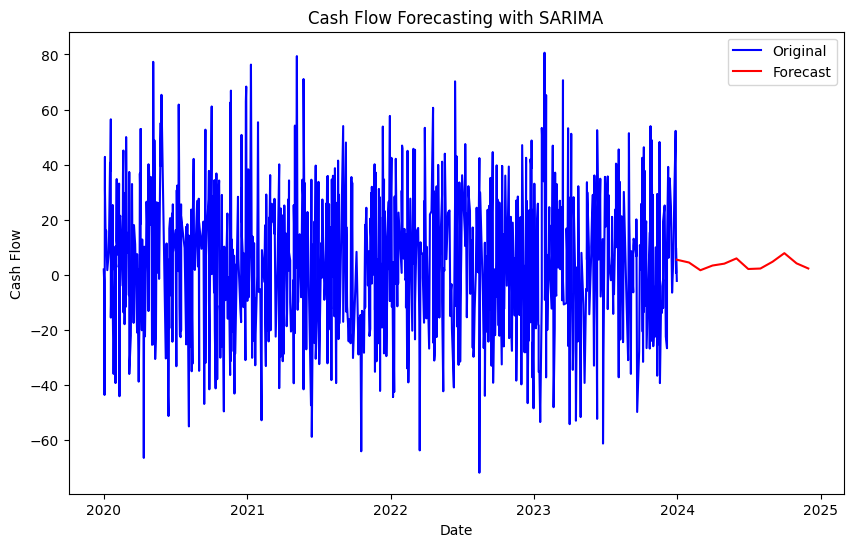

                                     SARIMAX Results                                      
Dep. Variable:                          Cash Flow   No. Observations:                 1000
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood               -4627.203
Date:                            Sat, 18 May 2024   AIC                           9264.405
Time:                                    11:16:48   BIC                           9288.879
Sample:                                         0   HQIC                          9273.713
                                           - 1000                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0168      0.032     -0.522      0.602      -0.080       0.046
ma.L1         -0.9999      0.250   

In [51]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Load the data
data = pd.read_excel('/content/time.xlsx')

# Convert the date column to datetime format
data['Date'] = pd.to_datetime(data['Date'])

# Set the date column as the index
data.set_index('Date', inplace=True)

# Define the order and seasonal_order parameters
order = (1, 1, 1)  # Example order (p, d, q)
seasonal_order = (1, 1, 1, 12)  # Example seasonal order (P, D, Q, s)

# Fit the SARIMA model
model = SARIMAX(data['Cash Flow'], order=order, seasonal_order=seasonal_order)
model_fit = model.fit(disp=False)

# Forecast future cash flows
forecast_steps = 12  # Adjust according to your needs
forecast = model_fit.forecast(steps=forecast_steps)

# Plot the original data and the forecast
plt.figure(figsize=(10, 6))
plt.plot(data.index, data['Cash Flow'], color='blue', label='Original')
plt.plot(pd.date_range(start=data.index[-1], periods=forecast_steps, freq='d'), forecast, color='red', label='Forecast')
plt.title('Cash Flow Forecasting with SARIMA')
plt.xlabel('Date')
plt.ylabel('Cash Flow')
plt.legend()
plt.show()

# Display model summary
print(model_fit.summary())

# Create a DataFrame for the forecasted values with dates
forecast_dates = pd.date_range(start=data.index[-1], periods=forecast_steps, freq='d')
forecast_df = pd.DataFrame({'Date': forecast_dates, 'Forecasted Value': forecast})
print("Forecasted values with dates:")
print(forecast_df)
